# $GRIP:\ THE\ SPARK\ FOUNDATION$
### Data Science and Business Analylits Internship 
### Author: Suman Ghosh
### Task 1:predicting Using Supervised Learning
Task Aim: Predict the percentage of an student based on the no. of study hours.  
We will complete task 1 in jupyter notebook by using python 
##### Source of data: http://bit.ly/w-data

### Step 1: importing dataset:
At first we will import the dataset.To import dataset it is necessary to import pandas library. That is given below


In [2]:
import pandas as pd # import pandas library
data=pd.read_excel(r'F:\internship_spark_foundation\Assignment 1_regression\data_assign.xlsx') #import our given dataset in python
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
#cheeking shape of the data
data.shape

(25, 2)

In [3]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [3]:
#cheek missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#calculate summary of statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Data Visulization 
Now we will plot the data on 2-D graph with the following script

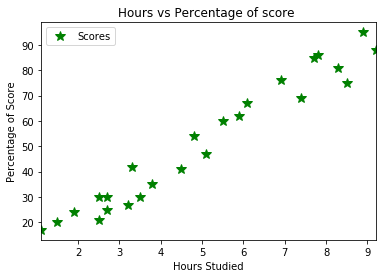

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color = 'green',markersize=10)
import matplotlib.pyplot as plt
plt.title('Hours vs Percentage of score ') #add tittle of the plot
plt.xlabel('Hours Studied')  # add x axix label
plt.ylabel('Percentage of Score') #add Y axis label
plt.show()

From the graph above, we can observe that there  is a linear relationship between "hour study " and percentage "score".
So, we can use the linear regression supersived machine model on it to predict further values.


In [7]:

# cheek relationship between two variables hours studied and percentage of score by using corr() function
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3: preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).



In [8]:
#print the first colomn of the dataset
x=data.iloc[:,0].values
x
#x=data.iloc[:,-1]
#x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [9]:
#print the sceond column of the dataset
y=data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Step 4 -:Model Training And testing:
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [46]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80,test_size=0.20,random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

In [55]:
#calculate regressor cor
m=regressor.coef_
m

array([9.91065648])

In [56]:
#calculate intercept
c=regressor.intercept_
c


2.018160041434683

### Step 5 :Plotting the Line of regression
Now since our model is trained now, its the time to visualize the best-fit line of regression. we will plot the linear regression equation $line=m*x\ +\ c$ after calculating the intercept and regressor coefficient

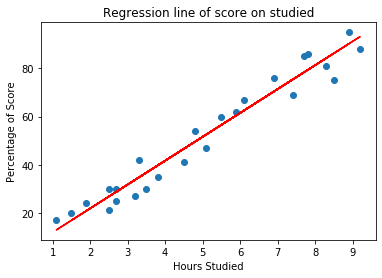

In [57]:
# Plotting the regression line
line = m*x+c
import matplotlib.pyplot as plt  #import matplot.pyplot library as a nick name plt
# Plotting for the test data
plt.scatter(x, y)
plt.title('Regression line of score on studied') #add tittle of the plot
plt.xlabel('Hours Studied')  # add x axix label
plt.ylabel('Percentage of Score') #add Y axis label
plt.plot(x, line,color='red')
plt.show()

### Step 6:  accurecy score

In [58]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211553


### Step 7: Making prediction

In [68]:
# Testing data
print(x_test)
# Model Prediction 
y_pred = regressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [69]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


######  What will be predicted score if a student studies for 9.25 hrs/ day?

In [77]:
p=regressor.predict([[9.25]])
print(" predicted score if a student studies for 9.25 hrs/ day is:",p)

 predicted score if a student studies for 9.25 hrs/ day is: [93.69173249]


### Step 8 - Comparing Actual result to the Predicted Model result by using barplot

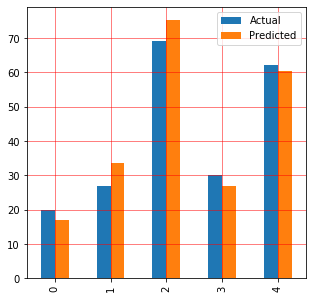

In [70]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### Step 9:calculate efficiency and deviation
for calulating different types of errors of linear regression model and efficiency it is neceassary to calculate metrics module from sklearn library

In [76]:
from sklearn import metrics  #import library
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


we know, R-2 gives the score of model fit. in this model  we have R-2 = 0.9454906892105355 ,ithat is nearest to 1.hence,these model is good fit for these data

###  I have completed Predict the percentage of an student based on the no. of study hours and was able to evaluate the model's performance on various parameters.¶